# PHYS F302 - Mécanique quantique : Travail personnel

#### Cordier Alix & Vandepopeliere Romain - BA3 PHYS

## Table des matières
0. [Introduction](#Introduction)
0. [Travail](#Travail)
    + [Discrétisation de l'équation](#Discrétisation)
    + [Conditions aux bords](#Conditions-aux-bords)
    + [Résolution de l'équation biharmonique](#Résolution)
        * [Première tentative](#Première-tentative)
        * [Deuxième tentative](#Deuxième-tentative)
        * [Version finale](#Version-finale)
    + [Valeurs en certains points](#Valeurs)
0. [Conclusion](#Conclusion)

## Introduction

Ce travail a pour but d'implémenter un écoulement de Stokes dans une cavité carrée en résolvant une équation biharmonique. Cet écoulement est un type d'écoulement dominé par des forces très visqueuses i.e. un coefficient de Reynolds très petit, voire nul en première approximation. L'écoulement est également supposé incompressible. Dans ces conditions, la résolution de l'équation de Navier-Stokes mène tout droit à une équation biharmonique pour $\psi$, la "stream function"
$$\nabla^4 \psi = 0 \, $$
définie comme 
\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   et   } v = - \frac{\partial \psi}{\partial x}
\end{equation}
avec $u$ la vitesse du fluide selon $x$ et $v$ celle selon $y$.


Attardons-nous au problème physique.
Nous nous mettons dans le cas où cette cavité carrée remplie d'un fluide dispose d'un couvercle qui coulisse à une vitesse constante vers les $x$ positifs (comme on le voit sur la figure 1). Les 4 bords sont supposés non-glissants et, naturellement, la quantité de fluide est supposée constante dans la cavité. Les conditions aux bords indiquées sur cette figure seront discutées [plus loin](#Conditions-aux-bords).


<img src="./figures/drivencavity.svg" width=400px>
#### <center> Figure 1 : Situation physique de la cavité et de son couvercle coulissant</center>

L'idée finale est d'obtenir l'aspect du fluide à l'intérieur de la cavité lorsqu'il aura atteint un état d'équilibre.

[Retour](#Table-des-matières)

## Travail

### Discrétisation 

Partons donc de notre équation biharmonique 

$$\nabla^4 \psi = 0 \, .$$

En termes des dérivées partielles, on a 
$$\frac{\partial^4 \psi}{\partial x^4} + 2\, \frac{\partial^4 \psi}{\partial x^2 \partial y^2} + \frac{\partial^4 \psi}{\partial y^4} = 0 \, .$$

Forts de notre expérience, nous savons que les dérivées d'ordre 2 se discrétisent facilement en schéma central selon, par exemple, au point $(x=idx,y=jdy)$ : 

$$\left. \frac{\partial^2 \psi}{\partial x^2} \right|_{\, i,j} = \frac{\psi_{i+1,j} - 2\psi_{i,j} + \psi_{i-1,j}}{dx^2} \, . $$

En appliquant une nouvelle dérivée seconde par rapport à la même variable à chacun des trois termes du numérateur précédent, on trouve facilement 

$$ \left. \frac{\partial^4 \psi}{\partial x^4} \right|_{\, i,j} = \frac{\psi_{i+2,j} -4\, \psi_{i+1,j} +6 \, \psi_{i,j} -4\, \psi_{i-1,j} + \psi_{i-2,j}}{dx^4} $$

$$ \left. \frac{\partial^4 \psi}{\partial y^4} \right|_{\, i,j} = \frac{\psi_{i,j+2} -4\, \psi_{i,j+1} +6 \, \psi_{i,j} -4\, \psi_{i,j-1} + \psi_{i,j-2}}{dy^4} $$

Pour ce qui est de la dérivée croisée, il suffit d'appliquer une dérivée seconde par rapport à l'autre variable à chacun des trois termes du fameux numérateur. Cela donne alors 

$$ \left. \frac{\partial^4 \psi}{\partial x^2 \partial y^2} \right|_{\, i,j} = \frac{\psi_{i+1,j+1}-2\, \psi_{i+1,j} + \psi_{i+1,j-1} -2 \, \psi_{i,j+1} + 4 \, \psi_{i,j} - 2\, \psi_{i,j-1} + \psi_{i-1,j+1} -2 \, \psi_{i-1,j} + \psi_{i-1,j-1}   }{dx^2dy^2} $$ 

Lorsque l'on choisit, comme ce sera le cas dans ce travail, des steps spatiaux tels que $dx=dy \equiv \delta$, 
on trouve que la discrétisation finale en schéma central de cette équation biharmonique est 

$$\left. \nabla^4 \psi \, \right|_{\, i,j} = \frac{\psi_{i+2,j} + 2 \, \psi_{i+1,j+1} -8\, \psi_{i+1,j} + 2\, \psi_{i+1,j-1} + \psi_{i,j+2}-8 \, \psi_{i,j+1} + 20 \, \psi_{i,j} -8\, \psi_{i,j-1} + \psi_{i,j-2} + 2\, \psi_{i-1,j+1} -8\, \psi_{i-1,j} + 2\, \psi_{i-1,j-1} + \psi_{i-2,j}}{\delta^4}  = 0  $$

Reportons tous ces coefficients sur un schéma pour y voir plus clair  : 
<img src="./figures/grid.png"  width=430px>
#### <center> Figure 2 : Discrétisation de l'équation biharmonique centrée en $(i,j)$</center>




*Remarque* : Dans le but d'avoir une orientation de grille qui est naturelle vis-à-vis d'un repère cartésien, la donnée $\psi_{i,j}$ sera stockée dans le tableau avec les indices p[j,i]. Ainsi, l'indice de ligne correspondra à $y$ et l'indice de colonne correspondra à $x$.

[Retour](#Table-des-matières)

### Conditions aux bords

Tout d'abord, justifions les conditions aux bords qui ne sont données dans la Figure 1.Les conditions de Neumann sont justifiables par la définition de la stream function elle-même 
\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   et   } v = - \frac{\partial \psi}{\partial x}
\end{equation}
avec $u$ la vitesse du fluide selon $x$ et $v$ celle selon $y$. Les parois étant non-glissantes, les éléments de fluide infinitésimalement proches auront une vitesse tangentielle nulle par rapport à elles. Les trois parois fixes sont donc accolées à un fluide immobile tout près de ces dernières et le couvercle à un fluide mobile de même vitesse que celle-ci, i.e. tel que $u=1$. Les dérivées sont donc nulles sur les trois parois fixes puisque le fluide ne s'y mouvoit pas. Celle du couvercle est logiquement égale à 
$$ \frac{\partial \psi}{\partial y} = 1 \, .$$ 


Les conditions de Dirichlet $\psi = 0$ sur les 4 bords signifient simplement qu'il n'y a pas de fluide qui passe à travers ces parois puisque pas de flot à ces endroits.

À présent, nous allons discrétiser ces conditions aux bords. Pour ce faire, il va falloir discrétiser des dérivées 1ères à l'ordre 2 avec un schéma "forward" ou "backward" selon le bord de la cavité traité. Avant cela, précisons tout de même que nous utilisons une grille $41 \times 41 $ pour la discrétisation spatiale de la cavité.

Commençons par le bord de gauche. Vu que le sens les x est défini de gauche à droite, on va utiliser le schéma "forward". La dérivée selon x de la fonction $\psi$ se discrétise alors comme suit:

$$ \left. \frac{\partial \psi}{\partial x}  \right|_{\,i,j} =\frac{-3/2 \psi_{i,j}+2 \psi_{i+1,j}-1/2 \psi_{i+2,j}}{\delta} $$

Et pour le bord concerné, on a:
$$ \left. \frac{\partial \psi}{\partial x} \right|_{\,0,j}=\frac{-3/2 \psi_{0,j}+2 \psi_{1,j}-1/2 \psi_{2,j}}{\delta} $$
où j est compris entre 1 et 39 inclus.

Par les conditions de Dirichlet, on sait que la dérivée sur le bord $\left. \frac{\partial \psi}{\partial x} \right|_{\,0,j}$ doit être nulle ainsi que la fonction sur le bord $\psi_{0,j}$. Par conséquent, l'expression devient:
$$\psi_{1,j}=\frac{1}{4} \psi_{2,j}$$
où $\psi_{2,j}$ est connu.

De la même manière, on utilise un schéma "forward" pour le bord du bas vu que le sens des y est défini de bas en haut. Similairement, on a:

$$ \left. \frac{\partial \psi}{\partial y} \right|_{\,i,0}=\frac{-3/2 \psi_{i,0}+2 \psi_{i,1}-1/2 \psi_{i,2}}{\delta} $$
avec i compris entre 1 et 39 inclus.
A nouveau, les termes $\left. \frac{\partial \psi}{\partial x} \right|_{\,i,0}$ et $\psi_{i,0}$ s'annulent. Par conséquent, on obtient:
$$\psi_{i,1}=\frac{1}{4} \psi_{i,2}$$
où $\psi_{i,2}$ est connu.

Pour les 2 bords restants, on va utiliser une discrétisation "backward". Selon ce schéma, une dérivée (selon x) se discrétise de la façon suivante:

$$\left. \frac{\partial \psi}{\partial x} \right|_{\,i,j} =\frac{1/2 \psi_{i-2,j}-2 \psi_{i-1,j}+3/2\psi_{i,j}}{\delta}$$

donc pour le bord de droite, on a:
$$\left. \frac{\partial \psi}{\partial x} \right|_{\,40,j} =\frac{1/2 \psi_{38,j}-2 \psi_{39,j}+3/2\psi_{40,j}}{\delta}$$
(avec j compris entre 1 et 39 inclus).
Comme précédemment, il y a annulation de la dérivée et de la fonction sur les bords, ce qui mène à:
$$\psi_{39,j}=\frac{1}{4} \psi_{38,j}$$
où $\psi_{38,j}$ est connu.

Finalement, pour le bord du haut:
$$\left. \frac{\partial \psi}{\partial y} \right|_{\,i,40} =\frac{1/2 \psi_{i,38}-2 \psi_{i,39}+3/2\psi_{i,40}}{\delta}$$
(avec i compris entre 1 et 39 inclus).
La fonction sur ce bord $\psi_{i,40}$ s'annule et la dérivée $\left. \frac{\partial \psi}{\partial y} \right|_{\,i,40}$ vaut 1, donc la condition au bord est donnée par:
$$\psi_{i,39}=\frac{1}{4} \psi_{i,38}- \frac{\delta}{2}$$
où $\psi_{i,38}$ est connu.

*Remarque* : les formules utilisées pour la discrétisation "forward"/"backward" des dérivées 1ères à l'ordre 2 ont été tirées de [cette page](https://en.wikipedia.org/wiki/Finite_difference_coefficient).

[Retour](#Table-des-matières)

### Résolution 

Nous allons maintenant tenter de résoudre notre problème en utilisant la méthode du gradient conjugué. Pour rappel, l'idée générale de cette méthode est la suivante. On part d'un vecteur de valeurs initiales $\textbf{p}^0$ pour notre fonction $\psi$ et on obtient une série de vecteurs $\textbf{p}$ (qui se rapprochent de la solution), chaque $\textbf{p}$ étant obtenu en ajoutant un certain vecteur au précédent. Cet ajout de vecteur peut être vu comme un pas d'une certaine grandeur $\alpha$ dans une certaine direction $\textbf{d}$ bien choisies:
$$\textbf{p}^{k+1}=\textbf{p}^{k}+ \alpha \textbf{d}^{k}$$
Étant donné que nous voulons atteindre un état d'équilibre, l'arrêt de l'algorithme se fera lorsque la différence entre 2 valeurs de $\textbf{p}$ consécutives deviendra inférieure à une précision fixée.

Dans la méthode du gradient, on s'assure qu'une direction n'est sélectionnée qu'une fois. Ce choix permet d'obtenir des expressions particulières pour $\alpha$ et $\textbf{d}$.
Pour calculer ces expressions, nous aurons besoin des résidus $\textbf{r}$, qui dans notre cas, sont la différence entre le bilaplacien appliqué aux $\textbf{p}$ et notre terme de source (nul en tout point).

Les étapes à suivre dans l'algorithme seront les suivantes:
* On calcule juste la première direction de la façon suivante: $\textbf{d}^{0}=\textbf{r}^{0}$. Tout ce qui suit sera répété aussi longtemps que la précision souhaitée ne sera pas atteinte.
* On calcule la grandeur du pas: $\alpha=\frac{\textbf{r}^{k}.\textbf{r}^{k}}{A\textbf{d}^{k}.\textbf{d}^{k}}$ (A représente l'opérateur bilaplacien dans notre cas)
* On obtient $\textbf{p}^{k+1}=\textbf{p}^{k}+ \alpha \textbf{d}^{k}$
* On calcule le résidu: $\textbf{r}^{k+1}=\textbf{r}^{k}- \alpha A\textbf{d}^{k}$
* On calcule $\beta$, utile pour obtenir la direction: $\beta=\frac{\textbf{r}^{k+1}.\textbf{r}^{k+1}}{\textbf{r}^{k}.\textbf{r}^{k}}$
* On calcule la direction: $\textbf{d}^{k+1}=\textbf{r}^{k+1}+ \beta \textbf{d}^{k}$

On peut maintenant se lancer dans la résolution numérique. Commençons par importer les librairies dont nous aurons besoin:

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Dans la suite, nous allons tenir compte de la différence entre les itérations en utilisant la norme L1, que nous pouvons déjà définir ci-dessous:

In [2]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

#### Première tentative

Implémentons une fonction qui impose les conditions aux bords pour toutes les cases de la grille concernées. Bien que nous ayions discuté de ces conditions en termes d'indices relevants dans ce cas-ci (38,39, etc), nous allons utiliser les "indices négatifs" proposés par Python pour pouvoir utiliser cette fonction sur n'importe quelle grille

In [3]:
def ConditionsBords(p,delta):
    s=p.copy()
    
    ##Dirichlet
    s[:,0]=0
    s[0,:]=0
    s[:,-1]=0
    s[-1,:]=0
    
    ##Neumann
    s[2:-2,1]=(1/4)*p[2:-2,2]                    #gauche
    s[1,2:-2]=(1/4)*p[2,2:-2]                    #bas
    s[2:-2,-2]=(1/4)*p[2:-2,-3]                  #droite
    s[-2,2:-2]=(1/4)*p[-3,2:-2]-(1/2)*delta      #haut
    
    return s

Maintenant, faisons de même pour une fonction qui effectue le bilaplacien sur toutes les cases de la grille concernées. Il s'agit en fait de toutes les cases de la grille moins les deux "rangées" de cases près des bords, qui sont fixées par les conditions aux bords.

In [4]:
def Bilaplacien(d,delta):
    ##Dimensions grille 
    ny,nx=d.shape
    
    ##Produit A*d
    Ad=numpy.zeros((ny,nx))
    Ad[2:-2,2:-2]= (20*d[2:-2,2:-2] - 8*d[2:-2,3:-1] - 8*d[2:-2,1:-3] -\
        8*d[3:-1,2:-2] - 8*d[1:-3,2:-2] + 2*d[3:-1,3:-1] + \
        2*d[3:-1,1:-3] + 2*d[1:-3,3:-1] + 2*d[1:-3,1:-3] + \
        d[2:-2,4:] + d[2:-2,:-4] + d[4:,2:-2] + d[:-4,2:-2])/delta**4
    
    return Ad

La grosse partie est alors d'implémenter la méthode du gradient conjugué.

In [5]:
def conjugate_gradient_2d(p, b, delta, l1_target):
    
    ny, nx = p.shape
    r  = numpy.zeros((ny,nx))      # residual
    Ad  = numpy.zeros((ny,nx))     # to store result of matrix multiplication 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    # Résidu initial
    r = b-Bilaplacien(p,delta)       # r0 = b-A*p0
    d = r.copy()
    rho = numpy.sum(r*r)
    Ad = Bilaplacien(d,delta)
    sigma = numpy.sum(d*Ad)
    
    # Itérations
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        p = ConditionsBords(p,delta)      #Imposition conditions aux bords

        r = rk- alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        
        Ad=Bilaplacien(d,delta)
        sigma = numpy.sum(d*Ad)
        
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Nombre final itérations: {0:d}'.format(iterations))
    return p, l1_conv

Essayons ceci avec les paramètres de discrétisation qui nous sont imposés.

In [6]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)
delta = dx                    #ou delta = dy

l1_target = 1e-8

# Axis
x  = numpy.linspace(0,1,nx)
y  = numpy.linspace(0,1,ny)

Prenons une grille remplie de 0 comme grille initiale. Il parait naturel de déjà lui imposer nos conditions aux bords. En effet, sans avoir réalisé aucune step d'évolution, on peut déjà imaginer que cet "initial guess" fait sens dans notre situation physique.

In [7]:
# Initialisation 
p_i  = numpy.zeros((ny,nx))
p_i = ConditionsBords(p_i,delta)

Le bilaplacien de $\psi$ étant égal à 0, l'argument $b$ de la fonction *conjugate_gradient_2d* est nul.

In [8]:
p1, l1_conv = conjugate_gradient_2d(p_i.copy(),0, delta, l1_target)

Nombre final itérations: 648


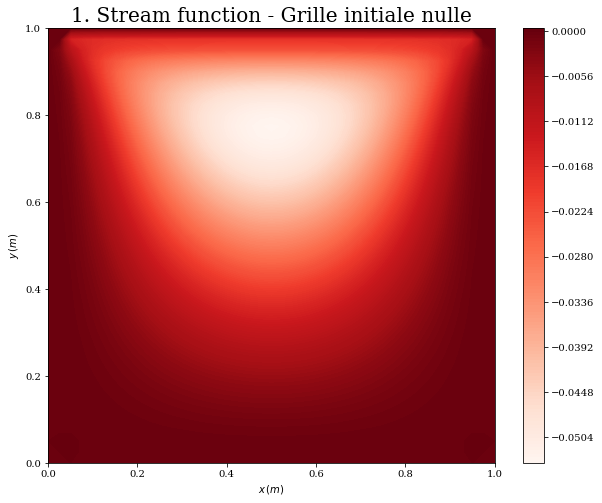

In [9]:
pyplot.figure(figsize=(10,8))
pyplot.title('1. Stream function - Grille initiale nulle',fontsize=20)
pyplot.contourf(x,y,p1,150,cmap=cm.Reds)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

*Remarque* : Les unités de toutes les stream functions $\psi$ que l'on affichera dans ce travail sont des $m^2/s$; cela se voit facilement via le lien entre cette $\psi$ et la vitesse $u$, par exemple.

Cette solution a l'air de faire sens physiquement. On a bien des valeurs nulles près des bords et les valeurs les plus grandes sont centrées près du côté du couvercle : c'est là où il y a les mouvements de fluide les plus compliqués. 

Réessayons maintenant cette procédure sur une grille initiale différente et voyons si l'état d'équilibre atteint est le même.

In [10]:
# Initialisation 
p_i  = numpy.ones((ny,nx))
p_i = ConditionsBords(p_i,delta)

In [11]:
p2, l1_conv = conjugate_gradient_2d(p_i.copy(),0, delta, l1_target)

Nombre final itérations: 649


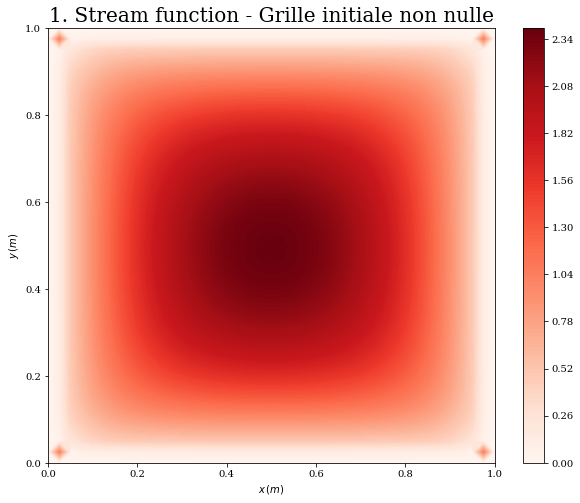

In [12]:
pyplot.figure(figsize=(10,8))
pyplot.title('1. Stream function - Grille initiale non nulle',fontsize=20)
pyplot.contourf(x,y,p2,150,cmap=cm.Reds)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

On ne retrouve plus du tout le même état d'équilibre qu'avant. De plus, cet état symétrique selon $y$ n'a pas beaucoup de sens puisque notre problème physique ne l'est pas.

#### Deuxième tentative

Pour résoudre le problème, nous allons modifier la fonction qui implémente la méthode du gradient conjugué. L'étape important de l'algorithme qui effectue l'évolution de la grille est
$$\textbf{p}^{k+1}=\textbf{p}^{k}+ \alpha \textbf{d}^{k} \, .$$
Nous imaginons qu'il pourrait être judicieux d'appliquer les conditions aux bords sur $\textbf{d}^k$ à chaque itération. Sans cela, on additionnait à chaque $\textbf{p}^{k}$ une matrice de "direction" qui n'était pas adaptée au problème physique. Conservons les mêmes 2 premières fonctions mais passons à une version "2.0" de *conjugate_gradient_2d*.

In [13]:
def conjugate_gradient_2d_v2(p, b, delta, l1_target):
    
    ny, nx = p.shape
    r  = numpy.zeros((ny,nx))      # residual
    Ad  = numpy.zeros((ny,nx))     # to store result of matrix multiplication 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    # Résidu initial
    r = b-Bilaplacien(p,delta)       # r0 = b-A*p0
    d = r.copy()
    d=ConditionsBords(d,delta)       #CB sur d
    rho = numpy.sum(r*r)
    Ad = Bilaplacien(d,delta)
    sigma = numpy.sum(d*Ad)
    
    # Témoin
    print("Nombre d'itérations : ")
    
    
    # Itérations
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        p = ConditionsBords(p,delta)      #Imposition conditions aux bords

        r = rk- alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        d=ConditionsBords(d,delta)        #CB sur d
        
        Ad=Bilaplacien(d,delta)
        sigma = numpy.sum(d*Ad)
        
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
        
     # Témoin 
        if(iterations%10000==0):
            print(iterations)
            
        
    print(iterations,"- Fin")
    return p, l1_conv

Voyons ce que cela donne pour une grille initialement nulle.

In [14]:
# Initialisation 
p_i  = numpy.zeros((ny,nx))
p_i = ConditionsBords(p_i,delta)

In [15]:
p3, l1_conv = conjugate_gradient_2d_v2(p_i.copy(),0, delta, l1_target)

Nombre d'itérations : 
10000
20000
30000
40000
41196 - Fin


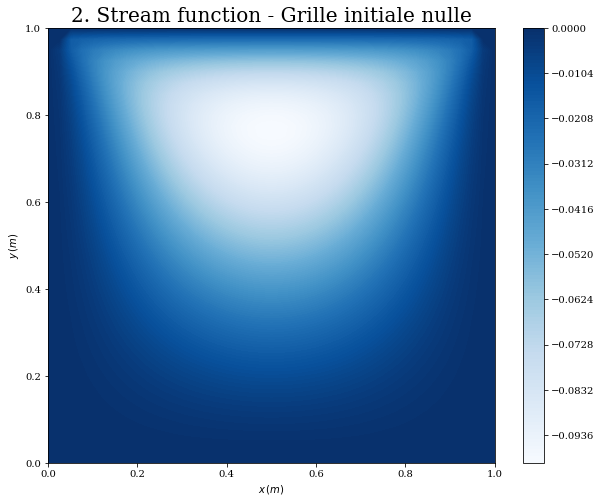

In [16]:
pyplot.figure(figsize=(10,8))
pyplot.title('2. Stream function - Grille initiale nulle',fontsize=20)
pyplot.contourf(x,y,p3,150,cmap=cm.Blues)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

Le résultat est très ressemblant à ce qu'on avait avant pour la même grille initiale. Remarquons tout de même que le nombre d'itérations nécessaires a considérablement augmenté. Testons ceci pour une grille initialement non nulle.

In [17]:
# Initialisation 
p_i  = numpy.ones((ny,nx))
p_i = ConditionsBords(p_i,delta)

In [18]:
p4, l1_conv = conjugate_gradient_2d_v2(p_i.copy(),0, delta, l1_target)

Nombre d'itérations : 
10000
20000
30000
40000
42794 - Fin


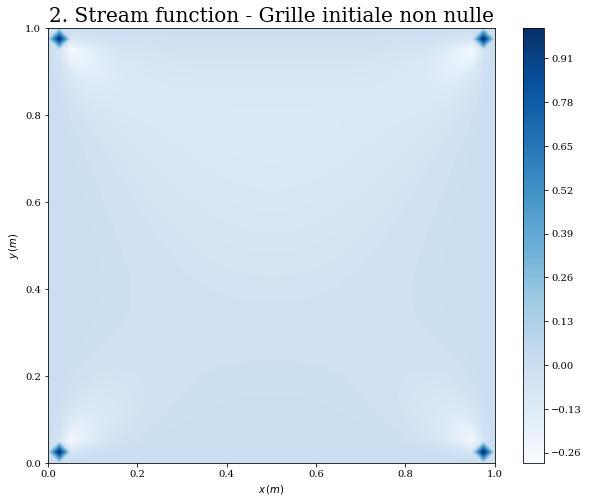

In [19]:
pyplot.figure(figsize=(10,8))
pyplot.title('2. Stream function - Grille initiale non nulle',fontsize=20)
pyplot.contourf(x,y,p4,150,cmap=cm.Blues)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

Bien que l'aspect symétrique selon $y$ ait disparu et que l'on peut apercevoir en fond le même type de forme que celle à laquelle on s'attend, il y a de nouveau un problème. Quatre points dans les coins présentent un comportement tout à fait inattendu et, la valeur de $\psi$ y étant tellement élevée (en fait égale à 1, comme on le verra plus tard), toutes les autres nuances sont presque "écrasées" dans les mêmes tons de couleur à cause de l'énorme constraste. 

#### Version finale

Ces quatre points n'ont pourtant rien de particulier physiquement parlant. Le soucis vient alors de la discrétisation et, plus particulièrement, de celle des conditions aux bords. En effet, souvenons-nous de la fonction *ConditionsBords*

In [20]:
def ConditionsBords(p,delta):
    s=p.copy()
    
    ##Dirichlet
    s[:,0]=0
    s[0,:]=0
    s[:,-1]=0
    s[-1,:]=0
    
    ##Neumann
    s[2:-2,1]=(1/4)*p[2:-2,2]                    #gauche
    s[1,2:-2]=(1/4)*p[2,2:-2]                    #bas
    s[2:-2,-2]=(1/4)*p[2:-2,-3]                  #droite
    s[-2,2:-2]=(1/4)*p[-3,2:-2]-(1/2)*delta      #haut
    
    return s

On voit en fait 4 points ne sont pas pris en compte par cette fonction : $[1,1],[1,-2],[-2,1],[-2,-2]$. Il ne s'agit pas d'une erreur; pour ne pas "aller trop loin" il fallait bien se limiter aux cases de type $2:-2$. Une façon simple de se convaincre du problème est de traiter le cas d'une toute petite grille remplie de 1 et d'y appliquer les conditions aux bords

In [21]:
p_i  = numpy.ones((5,5))
p_i=ConditionsBords(p_i,delta)
print(p_i)

[[0.     0.     0.     0.     0.    ]
 [0.     1.     0.25   1.     0.    ]
 [0.     0.25   1.     0.25   0.    ]
 [0.     1.     0.2375 1.     0.    ]
 [0.     0.     0.     0.     0.    ]]


*Remarque* : L'affichage du tableau fait que les lignes sont croissantes en $y$ en allant vers le bas.

Comme prévu, la fonction modifie bien les rangées et colonnes du bord mais, alors que seule la case centrale doit être intacte, les 4 points cités précédemment n'ont pas été changés non plus. Ceci va poser problème à la fin puisque la fonction *ConditionsBords* ne les modifie donc pas et que la fonction du bilaplacien ne touche qu'aux valeurs centrales (i.e. en dehors des deux colonnes et rangées les plus extérieures). Les valeurs finales de ces cases seront donc les initiales. 

Pour résoudre ce problème, il suffit de rajouter une modification sur ces cases dans la fonction *ConditionsBords*. Prenons pour exemple la case "problème" en bas à gauche de la cavité(i.e. $[1,1]$). Elle "aurait du" se retrouver dans les ligne et colonne de condition de Neumann $[1,:]$ et $[:,1]$. Pour rattraper le coup, on peut lui donner la valeur de la case adjacente en diagonale vers le centre divisée par 16 (puisque normalement 2 fois divisée par 4 successivement). Ainsi, cette case évoluera bien au fil des itérations car elle sera désormais reliée à une case du carré central qui évolue avec le bilaplacien. Ce petit raisonnement s'étend bien entendu aux 3 autres points. Redéfinissons alors une fonction de conditions aux bords 2.0.

In [22]:
def ConditionsBordsv2(p,delta):
    s=p.copy()
    
    ##Dirichlet
    s[:,0]=0
    s[0,:]=0
    s[:,-1]=0
    s[-1,:]=0
    
    ##Neumann
    s[2:-2,1]=(1/4)*p[2:-2,2]                    #gauche
    s[1,2:-2]=(1/4)*p[2,2:-2]                    #bas
    s[2:-2,-2]=(1/4)*p[2:-2,-3]                  #droite
    s[-2,2:-2]=(1/4)*p[-3,2:-2]-(1/2)*delta      #haut
    
    ##4 coins
    s[1,1] = p[2,2]/16
    s[1,-2] = p[2,-3]/16
    s[-2,1] = p[-3,2]/16
    s[-2,-2] = p[-3,-3]/16
    
    return s

Ce qui nous amène à une nouvelle redéfintion de la fonction biplacien. 

In [23]:
def conjugate_gradient_2d_v3(p, b, delta, l1_target):
    
    ny, nx = p.shape
    r  = numpy.zeros((ny,nx))      # residual
    Ad  = numpy.zeros((ny,nx))     # to store result of matrix multiplication 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    # Résidu initial
    r = b-Bilaplacien(p,delta)         # r0 = b-A*p0
    d = r.copy()
    d=ConditionsBordsv2(d,delta)       #CB sur d
    rho = numpy.sum(r*r)
    Ad = Bilaplacien(d,delta)
    sigma = numpy.sum(d*Ad)
    
    # Témoin
    print("Nombre d'itérations : ")
    
    
    # Itérations
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        p = ConditionsBordsv2(p,delta)      #Imposition conditions aux bords

        r = rk- alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        d=ConditionsBordsv2(d,delta)        #CB sur d
        
        Ad=Bilaplacien(d,delta)
        sigma = numpy.sum(d*Ad)
        
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
        
     # Témoin 
        if(iterations%10000==0):
            print(iterations)
            
        
    print(iterations,"- Fin")
    return p, l1_conv

De nouveau, retestons ces nouvelles fonctions sur une grille initiale nulle.

In [24]:
# Initialisation 
p_i  = numpy.zeros((ny,nx))
p_i = ConditionsBordsv2(p_i,delta)

In [25]:
p5, l1_conv = conjugate_gradient_2d_v3(p_i.copy(),0, delta, l1_target)

Nombre d'itérations : 
10000
20000
30000
40000
40540 - Fin


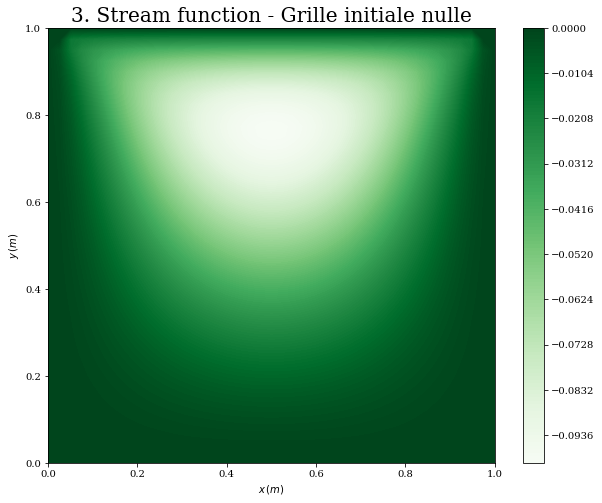

In [26]:
pyplot.figure(figsize=(10,8))
pyplot.title('3. Stream function - Grille initiale nulle',fontsize=20)
pyplot.contourf(x,y,p3,150,cmap=cm.Greens)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

Et sur une grille initialement non nulle.

In [27]:
# Initialisation 
p_i  = numpy.ones((ny,nx))
p_i = ConditionsBordsv2(p_i,delta)

In [28]:
p6, l1_conv = conjugate_gradient_2d_v3(p_i.copy(),0, delta, l1_target)

Nombre d'itérations : 
10000
20000
30000
40000
42633 - Fin


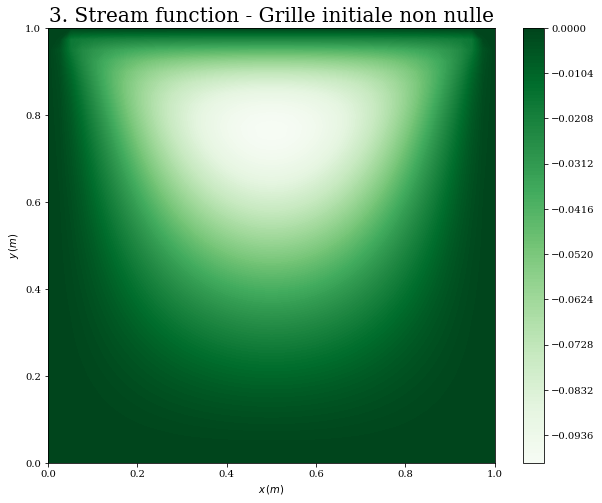

In [29]:
pyplot.figure(figsize=(10,8))
pyplot.title('3. Stream function - Grille initiale non nulle',fontsize=20)
pyplot.contourf(x,y,p6,150,cmap=cm.Greens)
pyplot.xlabel('$x \,(m)$')
pyplot.ylabel('$y \,(m)$')
pyplot.colorbar();

Parfait! Nous trouvons des états d'équilibre qui paraissent identiques à partir de configurations initiales différentes. Vérifions cette concordance à la [section suivante](#Valeurs).

[Retour](#Table-des-matières)

### Valeurs

Nous allons maintenant regarder les différentes valeurs prises par la fonction $\psi$ aux emplacements (0.6;0.2), (0.6;0.4), (0.6;0.6) et (0.6;0.8). Ces coordonnées correspondent exactement à des indices entiers de la discrétisation. Tout d'abord pour la grille initiale nulle, on a  : 

In [30]:
print("En (0.6;0.2) :", p5[8,24])
print("En (0.6;0.4) :", p5[16,24])
print("En (0.6;0.6) :", p5[24,24])
print("En (0.6;0.8) :", p5[32,24])

En (0.6;0.2) : -0.010031985992590878
En (0.6;0.4) : -0.03615095405079115
En (0.6;0.6) : -0.07383535875612988
En (0.6;0.8) : -0.09453573695043677


Et puis pour la grille initiale remplie de 1 : 

In [31]:
print("En (0.6;0.2) :", p6[8,24])
print("En (0.6;0.4) :", p6[16,24])
print("En (0.6;0.6) :", p6[24,24])
print("En (0.6;0.8) :", p6[32,24])

En (0.6;0.2) : -0.010032129242892342
En (0.6;0.4) : -0.03615147317657011
En (0.6;0.6) : -0.0738364216075776
En (0.6;0.8) : -0.09453709593370953


[Retour](#Table-des-matières)

## Conclusion

Lors de ce travail, nous avons appris à discrétiser une équation biharmonique ainsi que des conditions aux bords de  Dirichlet d'une part et de Neumann d'autre part. Ces dernières ont pu se faire selon un schéma *backward* ou *forward* en fonction de l'endroit où elles s'appliquaient. 

L'implémentation à notre problème physique de la méthode de gradient conjugué était loin d'être évidente; nous avons été confrontés à plusieurs problèmes. Premièrement, il y  avait un gros manque de stabilité en les conditions initiales. Deuxièmement, 4 points posaient problème à cause de la discrétisation des conditions de Neumann. Finalement, nous sommes arrivés à des solutions de stream functions $\psi$ qui semblent probables. En effet, intuitivement, un liquide dans une cavité caractérisée par un couvercle coulissant aura tendance à tourner et à décrire un mouvement global de rotation autour d'un point central. De plus, on imagine qu'il n'y aura presque pas de mouvements près des parois et dans le fond de la cavité. Nous retrouvons ces caractéristiques sur les graphiques finaux. En effet, la stream function présente des valeurs élevées (dans les négatifs, mais peu importe) autour d'une zone centrale située du côté du couvercle et tend à s'annuler vers les bords et le fond de la cavité.

Finalement, nous avons extrait les valeurs de $\psi$ à 4 points de la cavité. Nous avons constaté que ces valeurs, bien que très proches, étaient différentes pour une grille initialement nulle ou remplie de 1. Ces petites différences sont peut-être causées par une norme limite désirée pas assez petite. Ainsi, on n'aurait pas atteint exactement l'équilibre. Quoiqu'il en soit, il y a toujours une limitation de précision dûe à la discrétisation de l'équation et des conditions aux bords.

Nous nous contenterons donc de présenter les valeurs finales de la stream function à l'état d'équilibre avec une précision donnée jusqu'à la décimale commune des résultats :
$$\psi(0.6;0.2) = -0.010032 \, \text{m}^2/\text{s}$$
$$\psi(0.6;0.4) = -0.036151 \, \text{m}^2/\text{s}$$
$$\psi(0.6;0.6) = -0.073836 \, \text{m}^2/\text{s}$$
$$\psi(0.6;0.8) = -0.094536 \, \text{m}^2/\text{s}$$

[Retour](#Table-des-matières)